In [38]:
#Importing module
#Module haru import garey ko
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing csv file
#Csv file import garey ko
df = pd.read_csv('/content/drive/MyDrive/Seep 2025/NetflixOriginals.csv', encoding='latin-1')

df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


#Data profiling

In [39]:
#Creating a copy of csv file
#Csv file ko copy banako
df_copy_1 = df.copy()

#Checking Datatype of column and non null value
#Yo data_set ma kun kun datatype xa bhanera check garey ko
df_copy_1.info()

#Checking the first few rows of csv files
#Yo csv file ya data_set ko pailo rows haru hereko
df_copy_1.head()

#To check the mathmatical values of the data_set
#Data_set ko mathmatical value check garey ko
df_copy_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


#Data Quality Check

In [40]:
#Finding null value in data
#Kunai column ma khali data xa ki bhanera check harey ko
df_copy_2 = df_copy_1.copy()
df_copy_2.isnull().sum()

,0
Title,0
Genre,0
Premiere,0
Runtime,0
IMDB Score,0
Language,0


In [41]:
#Duplicated data check
#Eutai data dui tin chatti xa ki xaina vanera check garey ko
df_copy_2.duplicated().sum()

np.int64(0)

#Feature Enginering

1. Catogorizing the flim in short, medium, long

In [42]:
#Function to seperate runtime
#Runtime lai xutauna lai function
def runtime_category(x):
    if x < 60:
        return 'Short'
    elif 60 <= x <= 100:
        return 'Medium'
    else:
        return 'Long'

#Creating a Runtime Cateogory columns to short the movie according to its runtime
#Flim lai tesko time anusar xutara Runtime_Category ma store garey ko
df_copy_2['Runtime_Category'] = df_copy_2['Runtime'].apply(runtime_category)

df_copy_2

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Runtime_Category
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Short
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Medium
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Medium
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Medium
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Medium
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Long
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Medium
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,Long
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Medium


2. Creating premier_year to seprate year from premier

In [45]:
#Changing the Premier to Datetime
#Premiere lai Datetime ma change garey ko
df_copy_2['Premiere'] = pd.to_datetime(df_copy_2['Premiere'], errors='coerce', format='mixed')

#Seprating the Year from premiere and storing it in premiere_year column
#Hamley premier bata barsa nikaley ra premiere_year column ma rakhyem
df_copy_2['Premiere_Year'] = df_copy_2['Premiere'].dt.year

3. Age of Flim

In [46]:
#Importing datetime from datetime module
#Datetime function lai datetime module bata import garey ko
from datetime import datetime

#Getting current year from Datetime function
#Yo kun barsa ho vanera datetime function lai sodhey ko
current_year = datetime.now().year

#Creating Film_Age column
#Film_Age vani column banako
df_copy_2["Film_Age"] = current_year - df_copy_2["Premiere_Year"]

df_copy_2

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Runtime_Category,Premiere_Year,Film_Age
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Short,2019,6
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Medium,2020,5
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Medium,2019,6
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Medium,2018,7
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Medium,2020,5
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,Long,2018,7
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,Medium,2015,10
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,Long,2018,7
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,Medium,2020,5


# Visualization of Data


1. No. of Movie released per year


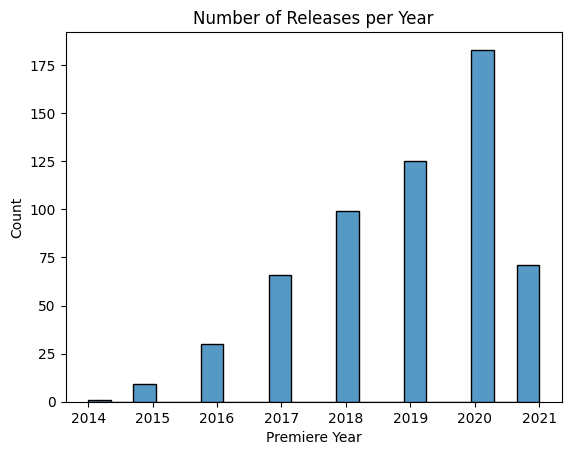

In [16]:
#Showing Number of flim released per year in histplot
#kun barsa ma katti ota flim haru niskey ko herna lai
sns.histplot(data=df_copy_2, x='Premiere_Year', bins=20)
plt.xlabel('Premiere Year')
plt.ylabel('Count')
plt.title('Number of Releases per Year')
plt.show()

2. Relation Between IMDB score and Language

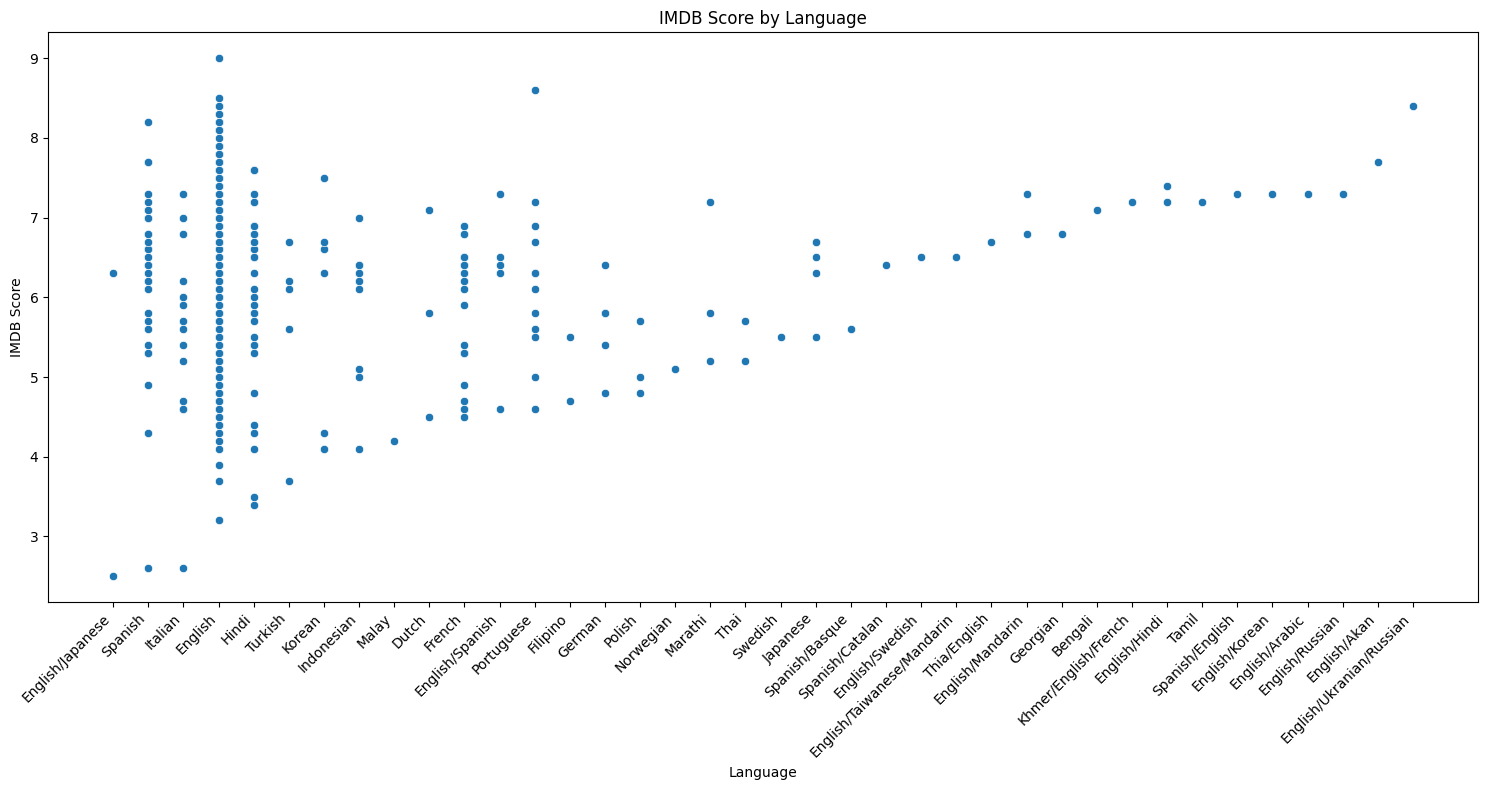

In [54]:
plt.figure(figsize=(15, 8))
# Showing relationship between Imbd score and language in scatterplot
# Imbd score ra language ki sambanda dekhau na lai
sns.scatterplot(data=df, x='Language', y='IMDB Score')
plt.title('IMDB Score by Language')
plt.xlabel('Language')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45, ha='right')
# Adjust layout to prevent labels overlapping
# Labels haru lai over lap garnu bata rokey ko
plt.tight_layout()
plt.show()

3. Relation between all the numeric

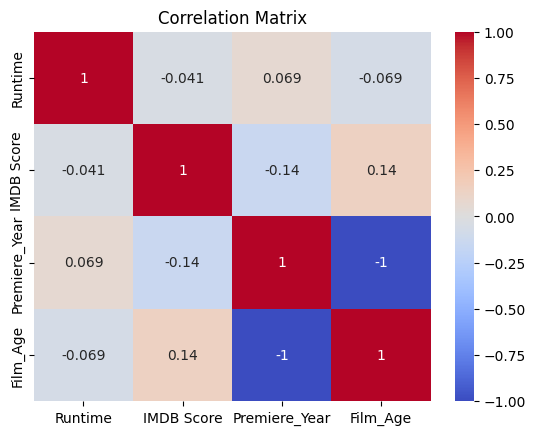

In [55]:
#How each numeric value effect each other
#Kasar numeric value haru ek arka lai farak parxa
corr = df_copy_2.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

4. IMDb Score Distribution by Runtime Category

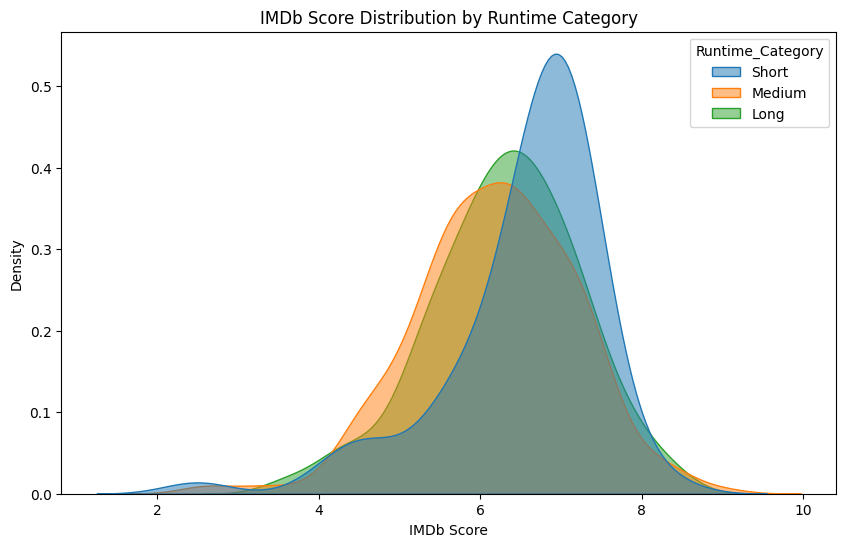

In [59]:
#IMDb Score Distribution by Runtime Category
#IMDb score kasari distribute vako xa Runtime Category anusar
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy_2,x="IMDB Score",hue="Runtime_Category",fill=True,common_norm=False,alpha=0.5)
plt.title('IMDb Score Distribution by Runtime Category')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.show()


# Finding and handeling outliers

In [60]:
#Finding numerical values in the column and retriving the columns name
#Kun kun columns haru ma number xa vanera tha pauna lai ani tyo colum ko nam nikal na lai
numerical_cols = df_copy_2.select_dtypes(include=np.number).columns.tolist()

print(numerical_cols)

['Runtime', 'IMDB Score', 'Premiere_Year', 'Film_Age']


1. Finding outliers

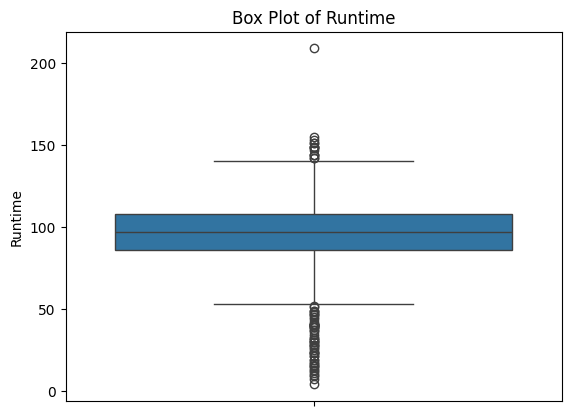

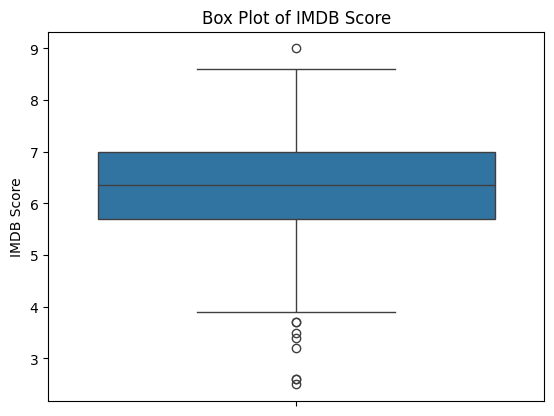

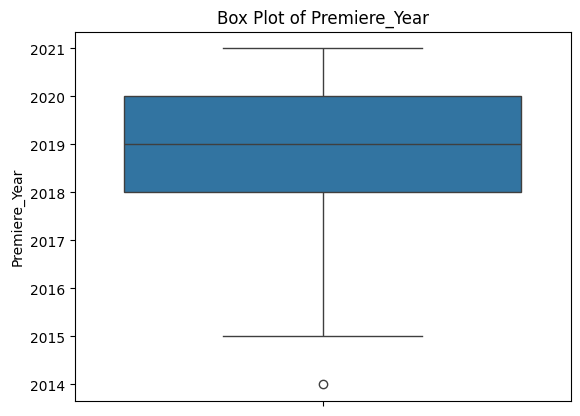

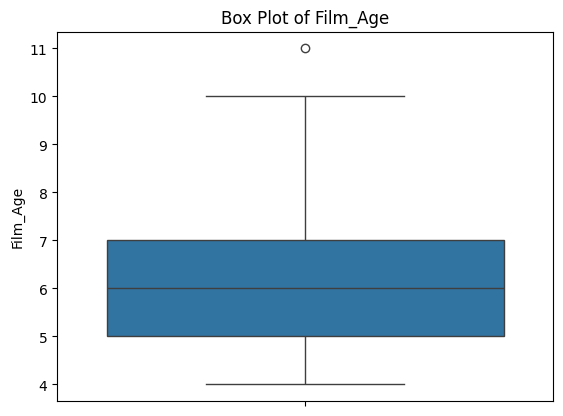

In [65]:
#To see the outliers in boxplot
#Boxplot outliers ma herna lai
for col in numerical_cols:
    sns.boxplot(data=df_copy_2, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [67]:
#To detect outliers
#Outliers haru lai detect garey
outlier_bounds = {}
for col in numerical_cols:
    Q1 = df_copy_2[col].quantile(0.25)
    Q3 = df_copy_2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

print(outlier_bounds)

{'Runtime': {'Q1': np.float64(86.0), 'Q3': np.float64(108.0), 'IQR': np.float64(22.0), 'Lower Bound': np.float64(53.0), 'Upper Bound': np.float64(141.0)}, 'IMDB Score': {'Q1': np.float64(5.7), 'Q3': np.float64(7.0), 'IQR': np.float64(1.2999999999999998), 'Lower Bound': np.float64(3.7500000000000004), 'Upper Bound': np.float64(8.95)}, 'Premiere_Year': {'Q1': np.float64(2018.0), 'Q3': np.float64(2020.0), 'IQR': np.float64(2.0), 'Lower Bound': np.float64(2015.0), 'Upper Bound': np.float64(2023.0)}, 'Film_Age': {'Q1': np.float64(5.0), 'Q3': np.float64(7.0), 'IQR': np.float64(2.0), 'Lower Bound': np.float64(2.0), 'Upper Bound': np.float64(10.0)}}


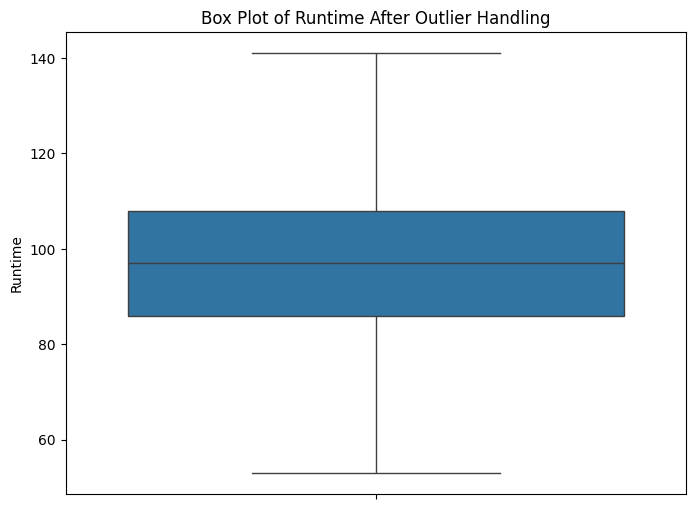

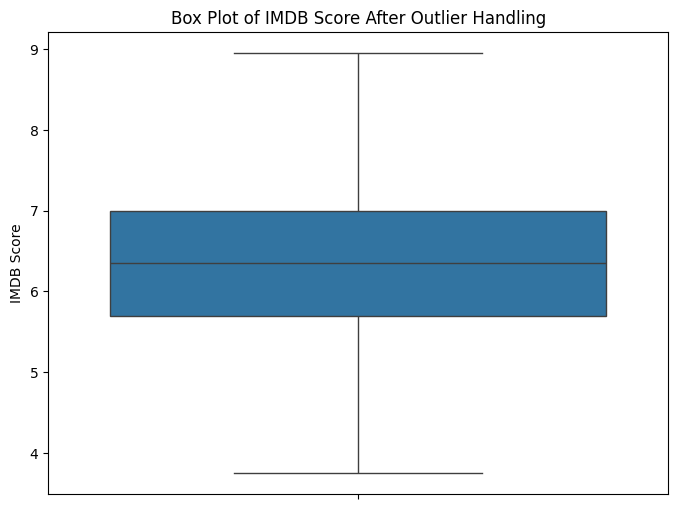

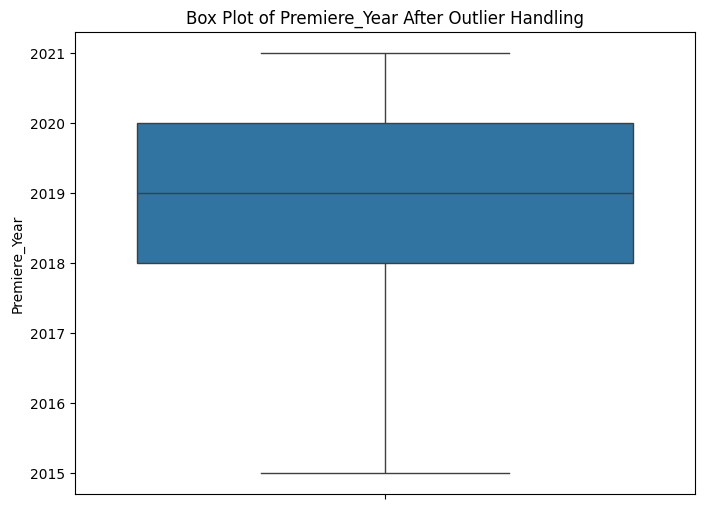

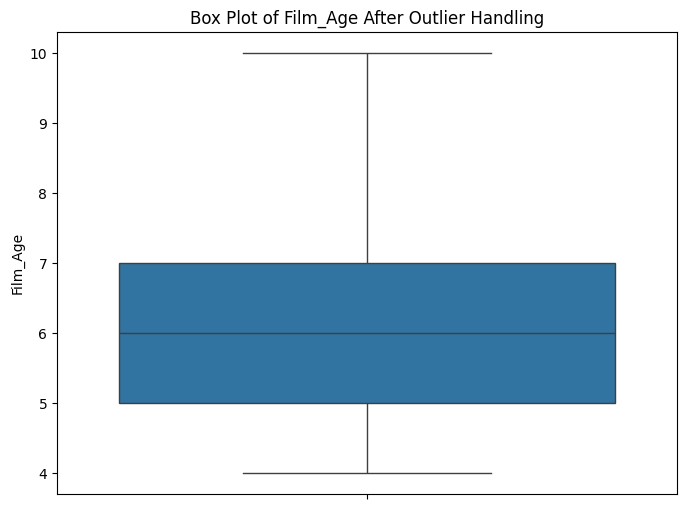

In [69]:
df_copy_3 = df_copy_2.copy()

for col in numerical_cols:
    lower_bound = outlier_bounds[col]['Lower Bound']
    upper_bound = outlier_bounds[col]['Upper Bound']

    # Cap outliers below the lower bound
    # Outliers lai lower bound sama simit garem
    df_copy_3[col] = np.where(df_copy_3[col] < lower_bound, lower_bound, df_copy_3[col])

    # Cap outliers above the upper bound
    # Outliers lai upper bound sama simit garem
    df_copy_3[col] = np.where(df_copy_3[col] > upper_bound, upper_bound, df_copy_3[col])

    # Plot the boxplot after capping
    # Simt gari sakey paxi plot garem
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_copy_3, y=col)
    plt.title(f'Box Plot of {col} After Outlier Handling')
    plt.ylabel(col)
    plt.show()


## Summary:

*   The most number of Flim was released in 2020.(Sabai vanda badi flim 2020 ma niskey ko thiyo)

*   The most number of Flim that was on IMDb score was Flim released in english language.(English ma niskey ko flim haru chai badi IMDb score ma auda rexa)

*   Short Flims are scored more higher than long and medium length Flims in IMDb score.(Sano time vako movie ley chai badi IMDb score pauda rexa)


*   The numerical features in the dataset were identified as 'Runtime', 'IMDB Score', 'Premiere\_Year', and 'Film\_Age'. (Yo dataset ko number bhako feature haru identify garey junki yini haru ho 'Runtime', 'IMDB Score', 'Premiere\_Year', and 'Film\_Age')

*   Initial box plots revealed the presence of outliers in these numerical features. (Hamro first boxplot ma otliers haru xa vanera thapayo)


*   The Interquartile Range (IQR) and the lower and upper bounds for outlier detection were calculated for each numerical feature using the 1.5 \* IQR rule. (Hamley yesma IQR lower bound ra upper bound calculate garem outliers detect garna lai)

*   Outliers were handled by capping the values at the calculated lower and upper bounds.(Upper ra lower value use garey ra hamley tyo baira ko outliers hatayem)

*   Box plots generated after outlier handling showed that outliers were significantly reduced or eliminated.(Hamley last ko box blot ma chai outlier haru lai ekdam gataye ya purai hatayem)

